In [108]:
import json,string
import pickle
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from nltk.corpus import stopwords
from textblob import TextBlob

In [205]:
# Some global variables to help the helper functions
table = str.maketrans({key: None for key in string.punctuation})
english_stopwords = stopwords.words('english')
for n,stopword in enumerate(english_stopwords):
    english_stopwords[n] = stopword.translate(table).lower()
english_stopwords = set(english_stopwords)

def clean_tweet(tweet):
    # Split by white space
    words = tweet.split()
    # Remove anything with "@", "t.co","&"
    for n,word in enumerate(words):
        if "@" in word or "t.co" in word or "#" in word:# or "&" in word:
            words[n] = ""
        else:
            # Remove punctuation and lowercase
            words[n] = word.translate(table).lower()
            # Check if clean word in clean stopword set
            if words[n] in english_stopwords or not words[n].isalnum():
                words[n] = ""
            
    clean_tweet = " ".join(filter(None,words))
    return clean_tweet

def parse_date_pst(df):
    utc_tz = pytz.UTC
    pst_tz = pytz.timezone('America/Los_Angeles')
    df['citation_date'] = pd.to_datetime(df['citation_date_raw'], unit='s')
    df['citation_date_pst'] = pd.to_datetime(df['citation_date_raw'], unit='s').apply(lambda x: x.tz_localize(utc_tz).astimezone(pst_tz))
    df['date'] = df['citation_date_pst'].apply(lambda x: x.strftime('%Y%m%d'))
    df['hour'] = df['citation_date_pst'].apply(lambda x: x.hour)
    df['minute'] = df['citation_date_pst'].apply(lambda x: x.minute)
    
def discretize_sentiment_polarity(df):
    discrete_sentiment = np.asarray(df['sentiment_polarity']).copy()
    positive_tweets = np.zeros(discrete_sentiment.shape)
    negative_tweets = np.zeros(discrete_sentiment.shape)
    positive_tweets[discrete_sentiment > 0] = 1
    negative_tweets[discrete_sentiment < 0 ] = 1
    discrete_sentiment[discrete_sentiment < 0] = -1
    discrete_sentiment[discrete_sentiment > 0] = 1
    df['discrete_sentiment'] = discrete_sentiment
    df['positive_tweets'] = positive_tweets
    df['negative_tweets'] = negative_tweets



In [44]:
DATA_DIRECTORY = "ECE219_tweet_data/"
filenames = ["tweets_#gopatriots.txt","tweets_#gohawks.txt"]

goPatriotsTweets = []
goHawksTweets = []

visitedTweets = set() # set to prevent repeat tweets 

for file in filenames:
    with open(DATA_DIRECTORY+file) as f:
        for line in f:
            json_tweet = json.loads(line)
            time = json_tweet['citation_date']
            text = json_tweet['tweet']['text']
            cleanTweet = clean_tweet(text)
            if cleanTweet not in visitedTweets:
                visitedTweets.add(cleanTweet)
                sentiment = TextBlob(cleanTweet).sentiment.polarity
                if file == "tweets_#gopatriots.txt":
                    goPatriotsTweets.append((text,time,sentiment))
                else:
                    goHawksTweets.append((text,time,sentiment))
                    
print("Number of #goPatriots tweets after removing repeats: %d" % len(goPatriotsTweets))
print("Number of #goHawks tweets after removing repeats: %d" % len(goHawksTweets))
                
with open('goPatriotsDataset.pickle','wb') as handle:
    pickle.dump(goPatriotsTweets,handle)
with open('goHawksTweets.pickle','wb') as handle:
    pickle.dump(goHawksTweets,handle)

Number of #goPatriots tweets after removing repeats: 16905
Number of #goHawks tweets after removing repeats: 121119


In [268]:
for i in range(100):
    print(goHawksTweets[-i])

('I &lt;3 our defense! #GoHawks http://t.co/U1pcXpEsR8', 1421518778, 0.0)
("The ultimate broken hearted hangover week from hell (#SB49) is almost over. Listening to the blues still. We'll get'em in #SB50 #GOHAWKS", 1423304269, -0.2)
('If you love Russell Wilson and want to know more about him. http://t.co/6XuXkyFJ9s #Seahawks #NFL #GoHawks', 1423295796, 0.5)
('How long to you think that it will be until we go back to the super bowl ? http://t.co/bvDyDl5XAr #Seahawks #NFL #GoHawks', 1423290285, 0.09444444444444444)
('Todd Gurley Edit http://t.co/fp5OgyMjhm #Seahawks #NFL #GoHawks', 1423288873, 0.0)
("Lane's Forearm Break. Happened to pause DVR at this awkward spot. http://t.co/mUN3YTs0au #Seahawks #NFL #GoHawks", 1423282533, -0.6)
('About our cap situation. http://t.co/VGZRjus9yT #Seahawks #NFL #GoHawks', 1423282531, 0.0)
('David Letterman with Bill Belichick next wednesday http://t.co/0NODHMMc0l #Seahawks #NFL #GoHawks', 1423280806, 0.0)
('"@sexysportsworld: "@Girl_in_jerseys: @_anache

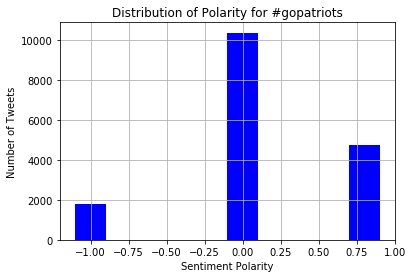

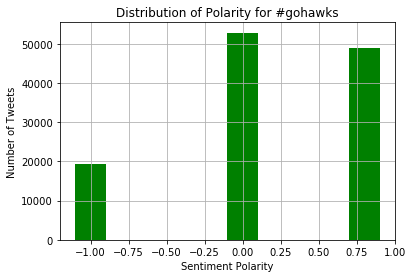

In [332]:
patriots_df = pd.DataFrame.from_records(goPatriotsTweets,columns=['text','citation_date_raw','sentiment_polarity'])
patriots_df['count']=1
parse_date_pst(patriots_df)
discretize_sentiment_polarity(patriots_df)
patriots_df['discrete_sentiment'].hist(color="Blue",align="left")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Polarity for #gopatriots")
plt.show()

hawks_df = pd.DataFrame.from_records(goHawksTweets,columns=['text','citation_date_raw','sentiment_polarity'])
hawks_df['count']=1
parse_date_pst(hawks_df)
discretize_sentiment_polarity(hawks_df)
hawks_df['discrete_sentiment'].hist(color="Green",align="left")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Polarity for #gohawks")
plt.show()

In [330]:
patriots_df = patriots_df.sort_values('sentiment_polarity',ascending=False)
tweets = np.array(patriots_df['text'])

for i in range(10):
    print(tweets[i])
    print('\n')
    

The greatest pic of the night #RichardSherman 😂 #sucka #GoPatriots #SuperBowIChamps 🙌🏈 http://t.co/6TcAWHnDjA


Best. Day. Ever.
#SuperBowlChamps2015
#GoPatriots ❤️💙🏈🎉🏆 http://t.co/oTDwC5NAw2


Tom Brady's Reaction was priceless!!! #GoPatriots  !!! #IncredibleWin !!! Womp womp to all who bet on the seahawks!!


We looking awesome tonight in every way #GoPatriots


@Marino_Pepen The Best on the World #GoPatriots


TODAY I'm with the best 🏈🏈🎇🎇
#SuperBowl #GoPatriots http://t.co/NtXqYQLKZt


@Patriots @nfl @nflnetwork Tom Brady needs to be the MVP... He is the best!!! #MVP #GoPatriots #Brady 👌👌🙌🙏🏈🏈1⃣2⃣


this #SuperBowl twitter battle between @ChrisEvans and @prattprattpratt is literally the best thing to watch these days.  #GoPatriots


@DonnieWahlberg I am so for the Patriots. I was for another team but they didn't make it, so now I am for the best team. #GoPatriots .🙌🙌🙌


That was freaking awesome #GoPatriots




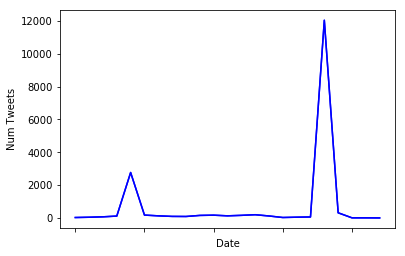

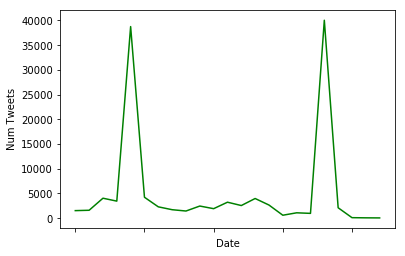

In [312]:
agg_pat_df = patriots_df.groupby([patriots_df['date']]).sum()
agg_pat_df['count'].plot(color='blue')
plt.xlabel('Date')
plt.ylabel('Num Tweets')
plt.show()

agg_hawk_df = hawks_df.groupby([hawks_df['date']]).sum()
agg_hawk_df = agg_hawk_df[:-2]
agg_hawk_df['count'].plot(color='green')
plt.xlabel('Date')
plt.ylabel('Num Tweets')
plt.show()

In [334]:
gameday_pat_df = patriots_df[patriots_df['date'] == "20150201"]
gameday_pat_df = gameday_pat_df[gameday_pat_df['hour'] >= 12]
gameday_pat_df = gameday_pat_df[gameday_pat_df['hour'] <= 19]

agg_gameday_pat = gameday_pat_df.groupby([gameday_pat_df['hour'],gameday_pat_df['hour']]).sum()

gameday_hawk_df = hawks_df[hawks_df['date'] == "20150201"]
gameday_hawk_df = gameday_hawk_df[gameday_hawk_df['hour'] >= 12]
gameday_hawk_df = gameday_hawk_df[gameday_hawk_df['hour'] <= 19]
agg_gameday_hawk = gameday_hawk_df.groupby([gameday_hawk_df['hour'],gameday_hawk_df['hour']]).sum()

In [335]:
agg_gameday_pat

,,citation_date_raw,sentiment_polarity,count,minute,discrete_sentiment,positive_tweets,negative_tweets
hour,hour,,,,,,,
12,12,525021557420,35.985354,369,11181,86.0,135.0,49.0
13,13,593318528414,38.532808,417,12348,93.0,145.0,52.0
14,14,1114075941996,66.351375,783,26574,173.0,252.0,79.0
15,15,2603785031033,115.720485,1830,52468,310.0,479.0,169.0
16,16,3150161248564,131.210782,2214,67502,331.0,463.0,132.0
17,17,1602118442850,76.007475,1126,32020,149.0,292.0,143.0
18,18,2839998167881,65.922689,1996,77962,156.0,282.0,126.0
19,19,3278239044972,204.337598,2304,29862,423.0,734.0,311.0


In [336]:
agg_gameday_hawk

,,citation_date_raw,sentiment_polarity,count,minute,discrete_sentiment,positive_tweets,negative_tweets
hour,hour,,,,,,,
12,12,3158666216633,266.703182,2220,66248,608.0,940.0,332.0
13,13,3189976288155,249.211473,2242,65281,526.0,866.0,340.0
14,14,4423578395850,319.516132,3109,100869,700.0,1220.0,520.0
15,15,9147396017441,617.330655,6429,191138,1422.0,2340.0,918.0
16,16,6994668115613,365.436129,4916,168636,770.0,1436.0,666.0
17,17,9076301058554,594.390636,6379,202737,1172.0,2130.0,958.0
18,18,7115644966961,407.472038,5001,166242,830.0,1511.0,681.0
19,19,3919944578363,350.364389,2755,62746,815.0,1387.0,572.0


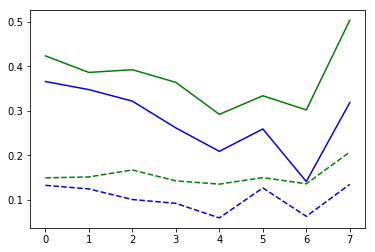

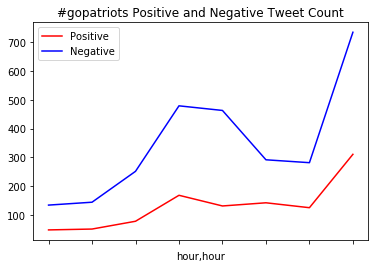

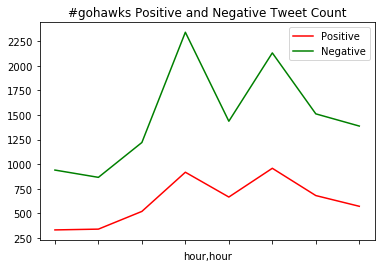

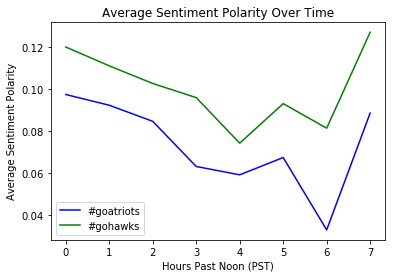

In [342]:
pat_gameday_negative = np.array(agg_gameday_pat['negative_tweets'])
pat_gameday_positive = np.array(agg_gameday_pat['positive_tweets'])
pat_gameday_count = np.array(agg_gameday_pat['count'])
pat_pos_percentage = pat_gameday_positive / (pat_gameday_count)
pat_neg_percentage = pat_gameday_negative / pat_gameday_count

hawk_gameday_negative = np.array(agg_gameday_hawk['negative_tweets'])
hawk_gameday_positive = np.array(agg_gameday_hawk['positive_tweets'])
hawk_gameday_count = np.array(agg_gameday_hawk['count'])
hawk_pos_percentage = hawk_gameday_positive/hawk_gameday_count
hawk_neg_percentage = hawk_gameday_negative/hawk_gameday_count

plt.plot(pat_pos_percentage,'b')
plt.plot(pat_neg_percentage,color="blue",ls="--")
plt.plot(hawk_pos_percentage,color="g")
plt.plot(hawk_neg_percentage,color="green",ls="--")
plt.show()

agg_gameday_pat['negative_tweets'].plot(color="red")
agg_gameday_pat['positive_tweets'].plot(color="blue")
plt.legend(['Positive','Negative'])
plt.title("#gopatriots Positive and Negative Tweet Count")
plt.show()

agg_gameday_hawk['negative_tweets'].plot(color="red")
agg_gameday_hawk['positive_tweets'].plot(color="green")
plt.legend(['Positive','Negative'])
plt.title("#gohawks Positive and Negative Tweet Count")
plt.show()

average_polarity_pat = np.array(agg_gameday_pat['sentiment_polarity']) / np.array(agg_gameday_pat['count'])
average_polarity_hawk = np.array(agg_gameday_hawk['sentiment_polarity']) / np.array(agg_gameday_hawk['count'])
plt.plot(average_polarity_pat,'b')
plt.plot(average_polarity_hawk,'g')
plt.xlabel("Hours Past Noon (PST)")
plt.ylabel("Average Sentiment Polarity")
plt.legend(['#goatriots','#gohawks'])
plt.title("Average Sentiment Polarity Over Time")
plt.show()

In [333]:
agg_gameday_pat

,,citation_date_raw,sentiment_polarity,count,minute,discrete_sentiment,positive_tweets,negative_tweets
hour,hour,,,,,,,
12,12,525021557420,35.985354,369,11181,86.0,135.0,49.0
13,13,593318528414,38.532808,417,12348,93.0,145.0,52.0
14,14,1114075941996,66.351375,783,26574,173.0,252.0,79.0
15,15,2603785031033,115.720485,1830,52468,310.0,479.0,169.0
16,16,3150161248564,131.210782,2214,67502,331.0,463.0,132.0
17,17,1602118442850,76.007475,1126,32020,149.0,292.0,143.0
18,18,2839998167881,65.922689,1996,77962,156.0,282.0,126.0
19,19,3278239044972,204.337598,2304,29862,423.0,734.0,311.0
20,20,224810551855,30.801304,158,5167,59.0,75.0,16.0


In [321]:
print(goHawksTweets[2][0])
print(clean_tweet(goHawksTweets[2][0]))

"Oh no big deal, just NFC West Champs and the number 1 seed again" #Seahawks #GoHawks #12s http://t.co/7NigOjTPz2
oh big deal nfc west champs number 1 seed
